<a href="https://colab.research.google.com/github/sugengdcahyo/multilabel-classification/blob/main/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Smart Tourism] - Multi-label sentiment analysis
---
> dataset sebanyak 20000 data, yang diambil dari review hotel yang ada dalam cakupan horizon group

Desain pekerjaan terdiri dari;
1. Exploratory Data Analysis
2. Data preprocessing
3. Feature Engineering
4. Model selection & training
5. Model Evaluation
6. Deployment


---
- S. F. Yilmaz, E. B. Kaynak, A. Koç, H. Dibeklioğlu and S. S. Kozat, "Multi-Label Sentiment Analysis on 100 Languages With Dynamic Weighting for Label Imbalance," in IEEE Transactions on Neural Networks and Learning Systems, vol. 34, no. 1, pp. 331-343, Jan. 2023, doi: 10.1109/TNNLS.2021.3094304. keywords: {Sentiment analysis;Task analysis;Training;Knowledge based systems;Wheels;Transfer learning;Time complexity;Cross-lingual;label imbalance;macro-f1 maximization;multi-label;natural language processing (NLP);sentiment analysis;social media},

- Z. Jin, X. Lai and J. Cao, "Multi-label Sentiment Analysis Base on BERT with modified TF-IDF," 2020 IEEE International Symposium on Product Compliance Engineering-Asia (ISPCE-CN), Chongqing, China, 2020, pp. 1-6, doi: 10.1109/ISPCE-CN51288.2020.9321861. keywords: {Bit error rate;Feature extraction;Task analysis;Sentiment analysis;Training;Data mining;Semantics;sentiment analysis;BERT;TF-IDF;multi-label classification},



## 1. Exploratory Data Analysis
- Label sentimen
- Label bahasa
- Penanganan missing values
- Deteksi data duplikat

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ace_tools # Install the ace_tools module using pip.
!apt-get install -y fonts-liberation
!fc-cache -fv

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['font.family'] = 'Liberation Sans'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-liberation is already the newest version (1:1.07.4-11).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/labeled_hotel_reviews.csv'  # Example:  '/content/drive/MyDrive/Colab Notebooks/your_file.csv'

try:
  df = pd.read_csv(file_path)
  df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [4]:
df.head(10)

,review_message,language,meal,service,location,staff,facility,room
0,New hotel in a strategic location in Jakarta. ...,English,not mentioned,positive,positive,not mentioned,not mentioned,not mentioned
1,Nice room dengan amenities yang lengkap. Yang ...,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,positive,positive
2,Makan di hotel ini sangat menyenangkan! Menu y...,Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,neutral
3,"buka bareng rekan disini, makanan enak dan sta...",Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,not mentioned
4,Close to the city center,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
5,Hotelnyaa luass bersihhh dan kamarnya sangat n...,Indonesian,neutral,neutral,not mentioned,neutral,not mentioned,neutral
6,nice experience stayed in this hotel,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
7,Pertama kali masuk area lobby sangat nyaman. p...,Indonesian,neutral,neutral,neutral,not mentioned,not mentioned,neutral
8,Very comfortable hotel. Friendly staff. Near t...,English,not mentioned,not mentioned,not mentioned,positive,not mentioned,not mentioned
9,"Stayed 2 nights, room was ok, cleanliness stil...",English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,positive


## Deteksi null value

In [5]:
df.isnull().sum()

,0
review_message,35
language,0
meal,0
service,0
location,0
staff,0
facility,0
room,0


In [6]:
df[df['review_message'].isnull()]

,review_message,language,meal,service,location,staff,facility,room
95,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
327,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
398,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
667,NaN,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
688,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
803,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
1003,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
1005,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
1499,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
1526,NaN,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned


In [7]:
df.dropna(subset=['review_message'], inplace=True)

In [8]:
df.isnull().sum()

,0
review_message,0
language,0
meal,0
service,0
location,0
staff,0
facility,0
room,0


## EDA - Data preprocessing
---
- melihat distribusi label data
- melihat korelasi antar label
- meninjau imbalanced data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung distribusi label untuk setiap kategori
sentiment_counts = {}
for col in df.columns:
    sentiment_counts[col] = df[col].value_counts()

# Konversi ke dataframe untuk plotting
sentiment_df = pd.DataFrame(sentiment_counts).fillna(0)

In [10]:
df_analysis = df.loc[:, df.columns != "review_message"].copy()

In [13]:
df_analysis

,language,meal,service,location,staff,facility,room
0,English,not mentioned,positive,positive,not mentioned,not mentioned,not mentioned
1,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,positive,positive
2,Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,neutral
3,Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,not mentioned
4,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
...,...,...,...,...,...,...,...
19995,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,neutral
19996,English,neutral,neutral,not mentioned,not mentioned,not mentioned,neutral
19997,English,not mentioned,neutral,not mentioned,not mentioned,not mentioned,neutral
19998,English,neutral,neutral,neutral,not mentioned,not mentioned,not mentioned


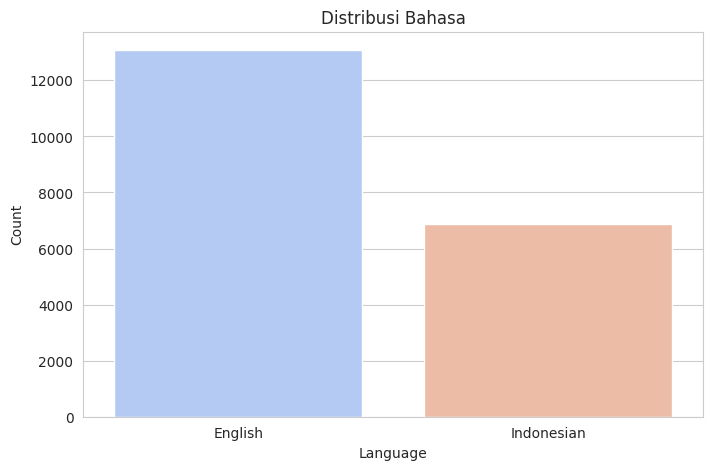

In [14]:
# Set style
sns.set_style("whitegrid")

# Plot distribusi bahasa
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="language", hue="language", legend=False, palette="coolwarm")
plt.title("Distribusi Bahasa")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

# Plot distribusi general sentiment
# plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x="general_sentiment", hue="general_sentiment", legend=False, palette="viridis")
# plt.title("Distribusi General Sentiment")
# plt.xlabel("General Sentiment")
# plt.ylabel("Count")
# plt.show()

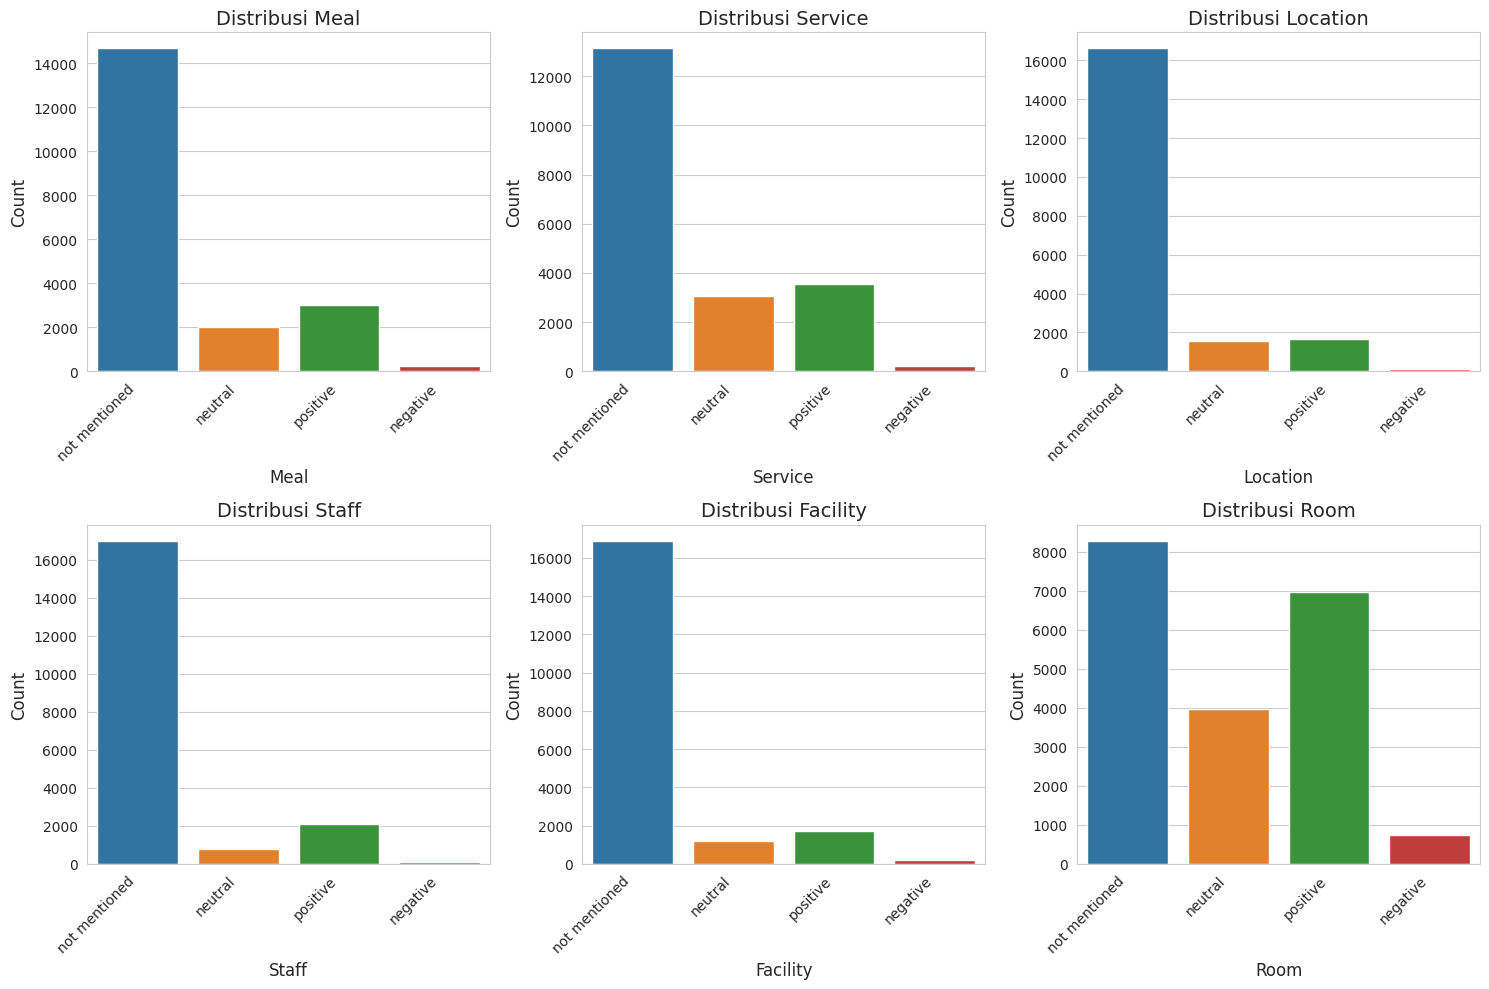

In [15]:
# Pastikan seaborn menggunakan gaya yang konsisten
sns.set_style("whitegrid")

# Daftar label yang akan diproses
labels = ["meal", "service", "location", "staff", "facility", "room"]

# Tetapkan kategori label secara eksplisit agar urutannya konsisten
sentiment_order = ["not mentioned", "neutral", "positive", "negative"]
category_type = pd.CategoricalDtype(categories=sentiment_order, ordered=True)

# Konversi setiap kolom ke tipe kategori untuk memastikan urutan tetap
for col in labels:
    df[col] = df[col].astype(category_type)

# Buat subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Pastikan jumlah warna sesuai jumlah kategori
palette = sns.color_palette("tab10", n_colors=len(sentiment_order))

# Loop untuk setiap label
for i, label in enumerate(labels):
    sns.countplot(data=df, x=label, hue=label, order=sentiment_order, ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribusi {label.capitalize()}", fontsize=14)
    axes[i].set_xlabel(label.capitalize(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)

    # Pastikan jumlah xticks sesuai dengan jumlah kategori
    axes[i].set_xticks(range(len(sentiment_order)))
    axes[i].set_xticklabels(sentiment_order, ha='right', rotation=45)

# Tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [16]:
aspect_columns = ["meal", "service", "location", "staff", "facility", "room"]

print(
    df[(df[aspect_columns] == "positive").all(axis=1)].shape,
    df[(df[aspect_columns] == "negative").all(axis=1)].shape,
    df[(df[aspect_columns] == "neutral").all(axis=1)].shape,
    df[(df[aspect_columns] == "not mentioned").all(axis=1)].shape
)

(60, 8) (1, 8) (35, 8) (4401, 8)


In [17]:

df_no_aspect = df[(df[aspect_columns] == "not mentioned").all(axis=1)]


In [18]:
df_no_aspect

,review_message,language,meal,service,location,staff,facility,room
4,Close to the city center,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
6,nice experience stayed in this hotel,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
31,"It's really good, I don't regret choosing to s...",English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
50,hari ini ikut iftr dihorison dengan suasana ra...,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
57,The check-in process took a long time even tho...,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
...,...,...,...,...,...,...,...,...
19964,Seru dan berkesan,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
19965,akan berkunjung kembali,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
19970,Oke semua,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
19975,Baik ...\nSesuai yg d harapkan,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned


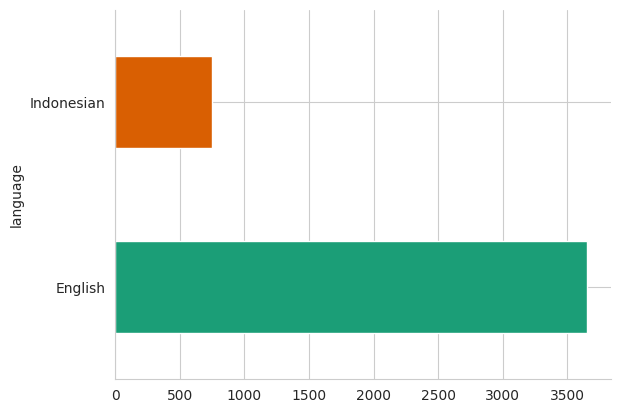

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
df_no_aspect.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Preprocessing
---
- Konversi text menjadi huruf kecil semua
- hapus karakter khusus, tanda baca dan angka
- tokenization: pisahkan kalimat menjadi kata
- hapus stopwords (kata tak bermakna)
- lemmatization (rubah kata menjadi bentuk dasar)
- gabung token menjadi kalimat
- encoding sentiment label


### Konversi text menjadi huruf kecil semua

In [19]:
df['review_message'] = df['review_message'].str.lower()

### Hapus karakter
yang dihapus adalah `[karakter khusus, tanda baca dan angka]`



In [20]:
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

In [21]:
df['review_message'] = df['review_message'].apply(clean_text)

In [22]:
df.review_message

,review_message
0,new hotel in a strategic location in jakarta h...
1,nice room dengan amenities yang lengkap yang k...
2,makan di hotel ini sangat menyenangkan menu ya...
3,buka bareng rekan disini makanan enak dan staf...
4,close to the city center
...,...
19995,pengalaman menginap di hotel sini sangat memua...
19996,kamar bersih nyaman pelayanan juga baik dan ma...
19997,pelayanannya sangat bagus juga kualitas hotel ...
19998,pelayanan baik letak hotel strategis makanan enak


### Slang removal

### Tokenization

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Unduh stopwords dan punkt_tab jika belum ada
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing punkt_tab resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
df['tokens'] = df['review_message'].apply(lambda x: word_tokenize(x.lower()))


In [25]:
df[["review_message", "tokens"]]

,review_message,tokens
0,new hotel in a strategic location in jakarta h...,"[new, hotel, in, a, strategic, location, in, j..."
1,nice room dengan amenities yang lengkap yang k...,"[nice, room, dengan, amenities, yang, lengkap,..."
2,makan di hotel ini sangat menyenangkan menu ya...,"[makan, di, hotel, ini, sangat, menyenangkan, ..."
3,buka bareng rekan disini makanan enak dan staf...,"[buka, bareng, rekan, disini, makanan, enak, d..."
4,close to the city center,"[close, to, the, city, center]"
...,...,...
19995,pengalaman menginap di hotel sini sangat memua...,"[pengalaman, menginap, di, hotel, sini, sangat..."
19996,kamar bersih nyaman pelayanan juga baik dan ma...,"[kamar, bersih, nyaman, pelayanan, juga, baik,..."
19997,pelayanannya sangat bagus juga kualitas hotel ...,"[pelayanannya, sangat, bagus, juga, kualitas, ..."
19998,pelayanan baik letak hotel strategis makanan enak,"[pelayanan, baik, letak, hotel, strategis, mak..."


### Stopwords removal


In [26]:
# Load stopwords bahasa Indonesia dan Inggris
stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))

# Fungsi untuk menghapus stopwords dari token
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [27]:
len(stop_words)

955

In [28]:
# Terapkan stopwords removal pada kolom 'tokens'
df['tokens_clean'] = df['tokens'].apply(remove_stopwords)

In [29]:
df[["tokens", "tokens_clean"]]

,tokens,tokens_clean
0,"[new, hotel, in, a, strategic, location, in, j...","[new, hotel, strategic, location, jakarta, pre..."
1,"[nice, room, dengan, amenities, yang, lengkap,...","[nice, room, amenities, lengkap, air, minum, b..."
2,"[makan, di, hotel, ini, sangat, menyenangkan, ...","[makan, hotel, menyenangkan, menu, beragam, le..."
3,"[buka, bareng, rekan, disini, makanan, enak, d...","[buka, bareng, rekan, makanan, enak, stafnya, ..."
4,"[close, to, the, city, center]","[close, city, center]"
...,...,...
19995,"[pengalaman, menginap, di, hotel, sini, sangat...","[pengalaman, menginap, hotel, memuaskan, nyaman]"
19996,"[kamar, bersih, nyaman, pelayanan, juga, baik,...","[kamar, bersih, nyaman, pelayanan, makanannya,..."
19997,"[pelayanannya, sangat, bagus, juga, kualitas, ...","[pelayanannya, bagus, kualitas, hotel, nya, ny..."
19998,"[pelayanan, baik, letak, hotel, strategis, mak...","[pelayanan, letak, hotel, strategis, makanan, ..."


### Stemming / Lemmatization
menggunakan lib Sastrawi

In [30]:
!pip install PySastrawi
!pip install stanza
# Install SpaCy dan Model Bahasa Inggris
!pip install spacy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [31]:
# join token dari tokens_clean menjadi review_cleaned
df["review_cleaned"] = df["tokens_clean"].apply(lambda tokens: " ".join(tokens))

In [32]:
df_indo = df[df["language"] == "Indonesian"]
df_english = df[df["language"] == "English"]

In [33]:
df_indo.shape, df_english.shape, df.shape

((6884, 11), (13081, 11), (19965, 11))

In [47]:
import stanza
import spacy

# Load model Stanza untuk Bahasa Indonesia
stanza.download("id")
nlp_id = stanza.Pipeline(lang='id', processors='tokenize,pos,lemma', package="default", use_gpu=True)

# Load model SpaCy untuk Bahasa Inggris
nlp_en = spacy.load("en_core_web_sm")


# Fungsi Lemmatization berdasarkan bahasa
def lemmatize_text_id(text):
    doc = nlp_id(text)
    return " ".join([word.lemma for sent in doc.sentences for word in sent.words])

def lemmatize_text_en(text):
    doc = nlp_en(text)
    return " ".join([token.lemma_ for token in doc])




INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...
INFO:stanza:File exists: /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| pos       | gsd_charlm   |
| lemma     | gsd_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [42]:
import torch
print("Apakah GPU tersedia?", torch.cuda.is_available())
print("Nama GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Tidak ada GPU")


Apakah GPU tersedia? True
Nama GPU: Tesla T4


In [35]:
# 5. Contoh Data
text_indo = "Saya berlari-larian ke sekolah setiap pagi."
text_eng = "The children are running quickly."

# 6. Lemmatization
print("Lemmatization ID:", lemmatize_text_id(text_indo))  # Output: "Saya lari ke sekolah setiap pagi."
print("Lemmatization EN:", lemmatize_text_en(text_eng))  # Output: "The child be run quickly."

Lemmatization ID: saya lari ke sekolah setiap pagi .
Lemmatization EN: the child be run quickly .


In [36]:
df_indo["review_cleaned"] = df_indo["review_cleaned"].apply(lemmatize_text_id)


<ipython-input-36-0a22c8733196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indo["review_cleaned"] = df_indo["review_cleaned"].apply(lemmatize_text_id)


In [37]:
df_english["review_cleaned"] = df_english["review_cleaned"].apply(lemmatize_text_en)

<ipython-input-37-1dad2dc58726>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english["review_cleaned"] = df_english["review_cleaned"].apply(lemmatize_text_en)


In [38]:

# Gabungkan df_indo dan df_english
df_final = pd.concat([df_indo, df_english], ignore_index=True)

In [48]:
df_final.head()

,review_message,language,meal,service,location,staff,facility,room,tokens,tokens_clean,review_cleaned
0,nice room dengan amenities yang lengkap yang k...,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,positive,positive,"[nice, room, dengan, amenities, yang, lengkap,...","[nice, room, amenities, lengkap, air, minum, b...",nice room amenities lengkap air minum botol ai...
1,makan di hotel ini sangat menyenangkan menu ya...,Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,neutral,"[makan, di, hotel, ini, sangat, menyenangkan, ...","[makan, hotel, menyenangkan, menu, beragam, le...",makan hotel senang menu ragam lezat layan rama...
2,buka bareng rekan disini makanan enak dan staf...,Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,not mentioned,"[buka, bareng, rekan, disini, makanan, enak, d...","[buka, bareng, rekan, makanan, enak, stafnya, ...",buka bareng rekan makan enak staf dia ramah ta...
3,hotelnyaa luass bersihhh dan kamarnya sangat n...,Indonesian,neutral,neutral,not mentioned,neutral,not mentioned,neutral,"[hotelnyaa, luass, bersihhh, dan, kamarnya, sa...","[hotelnyaa, luass, bersihhh, kamarnya, nyaman,...",hotelnyaa luass sihhh kamar dia nyaman playgro...
4,pertama kali masuk area lobby sangat nyaman pe...,Indonesian,neutral,neutral,neutral,not mentioned,not mentioned,neutral,"[pertama, kali, masuk, area, lobby, sangat, ny...","[kali, masuk, area, lobby, nyaman, pelayananny...",kali masuk area lobby nyaman layan dia ramah m...


In [41]:
# Simpan dataset ke dalam file CSV
csv_filename = "/content/drive/MyDrive/dataset/hotel_reviews_lemmatized.csv"
df_final.to_csv(csv_filename, index=False)

print(f"File {csv_filename} berhasil dibuat!")


File /content/drive/MyDrive/dataset/hotel_reviews_lemmatized.csv berhasil dibuat!
